In [1]:
print('hello world')

hello world


In [2]:
import os 
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" 

def fetch_housing_data(housing_url= HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

    

In [3]:
import pandas as pd 

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
fetch_housing_data()

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['ocean_proximity'].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
housing.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


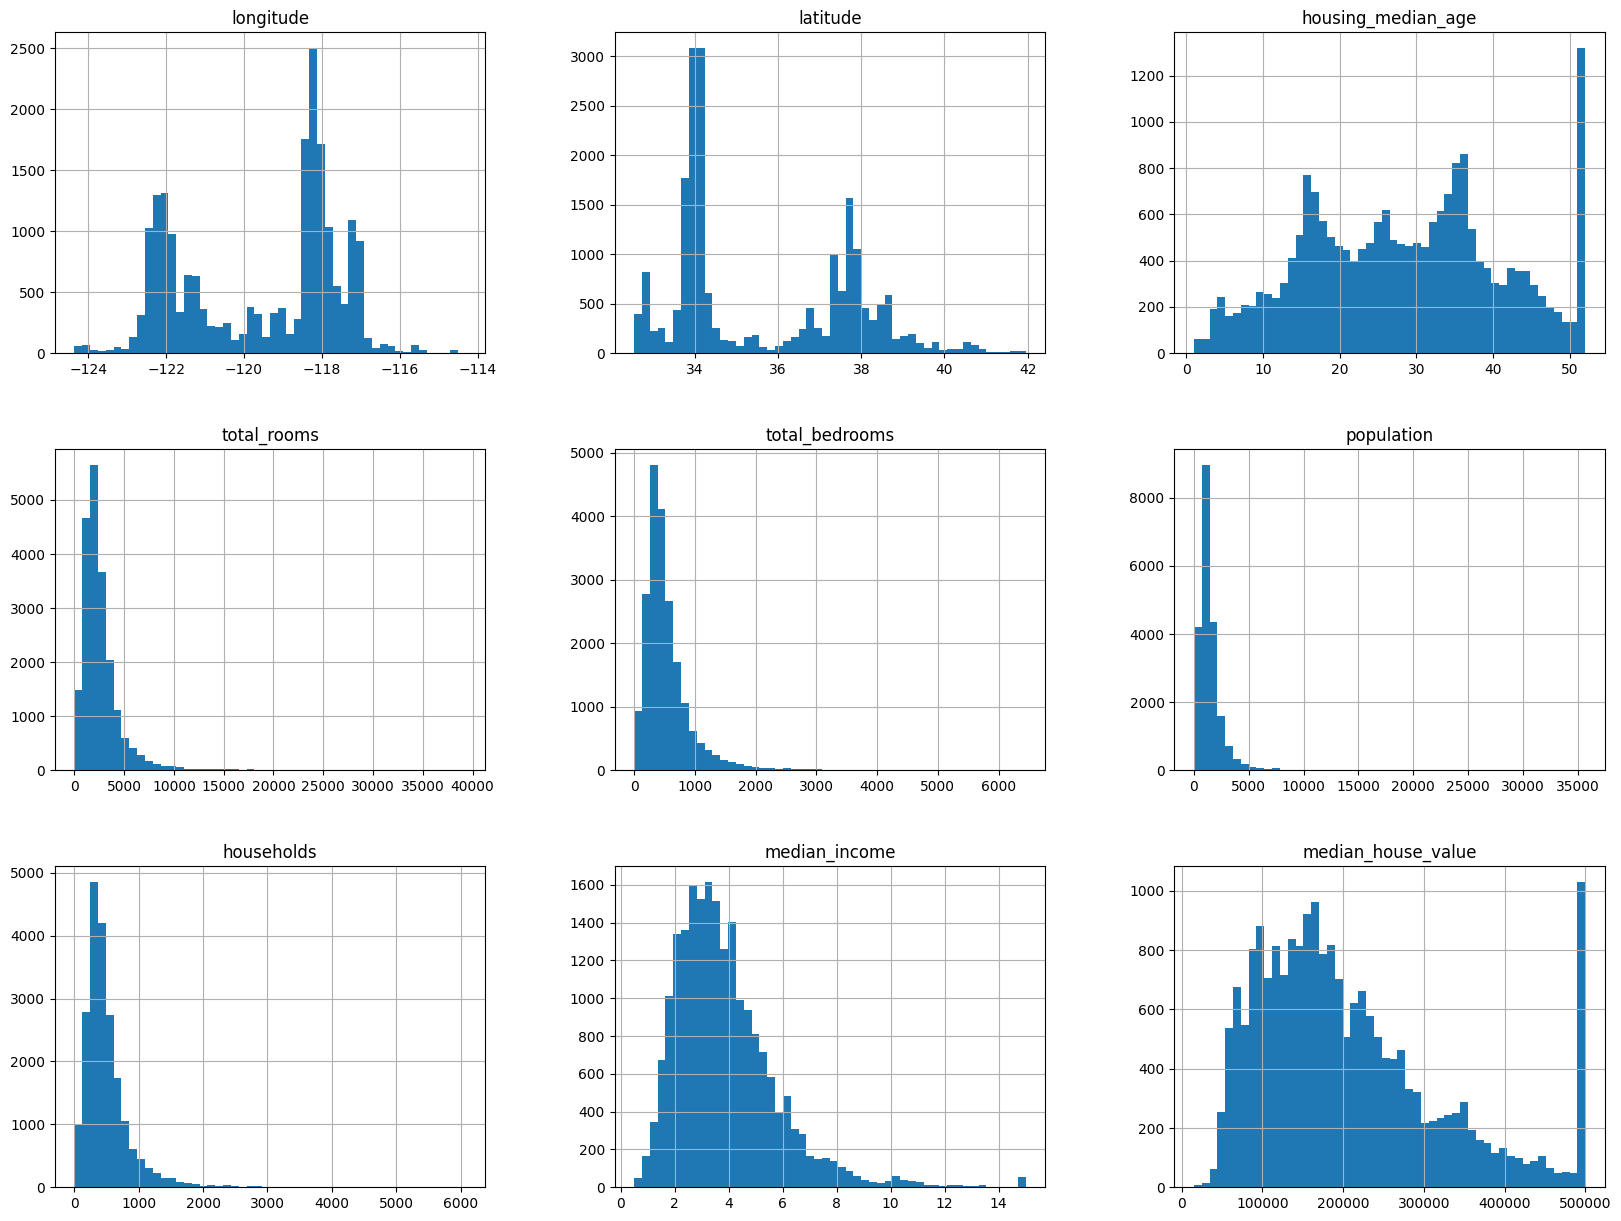

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
print(len(housing))
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set))

print(len(test_set))

20640
16512
4128


In [12]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [13]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]
    

In [14]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')



In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42) 


In [16]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0.,1.5,3.0,4.5,6.,np.inf], labels=[1,2,3,4,5])

# we divide the housing incomes into strata (or "bins") in this case, 0-1.5 is very low, 1.5-3.0 is low, etc. 
# we do this so that we can select a representative group of each 'bin' to combat random sampling bias


<Axes: >

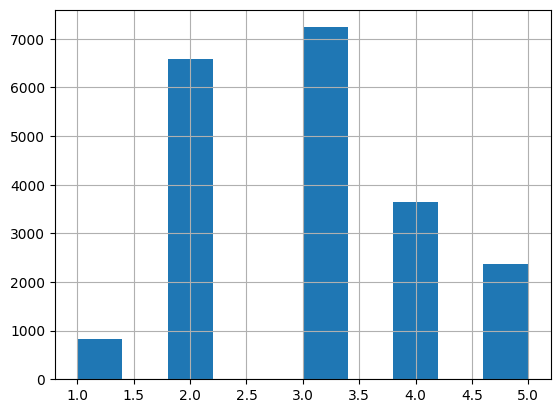

In [17]:
housing["income_cat"].hist()

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [19]:
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


In [20]:
housing['income_cat']

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [21]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True) 

In [22]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

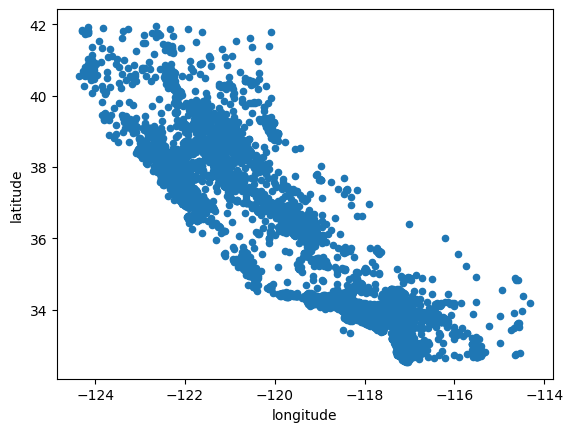

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

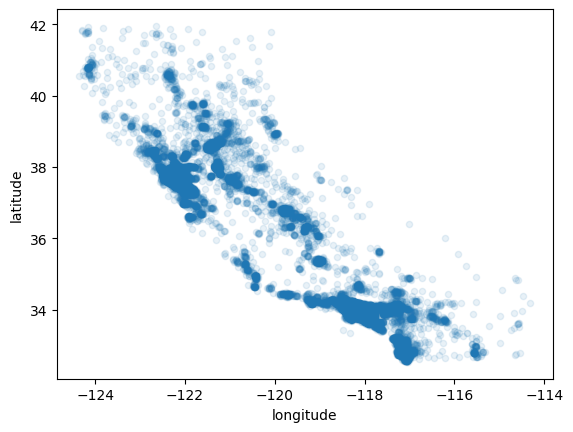

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

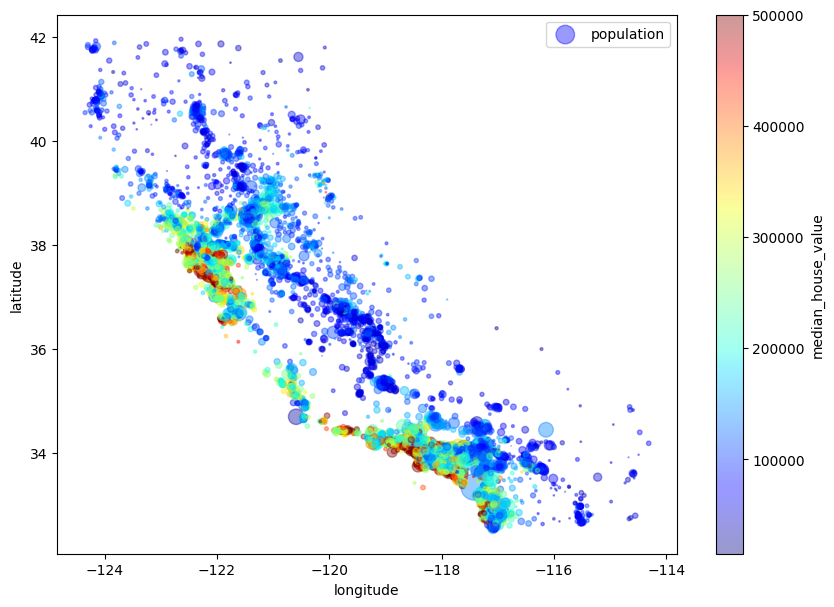

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True,)
# s= size, c = color, 
plt.legend()

In [26]:
corr_matrix = housing.corr(numeric_only = True)

In [27]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

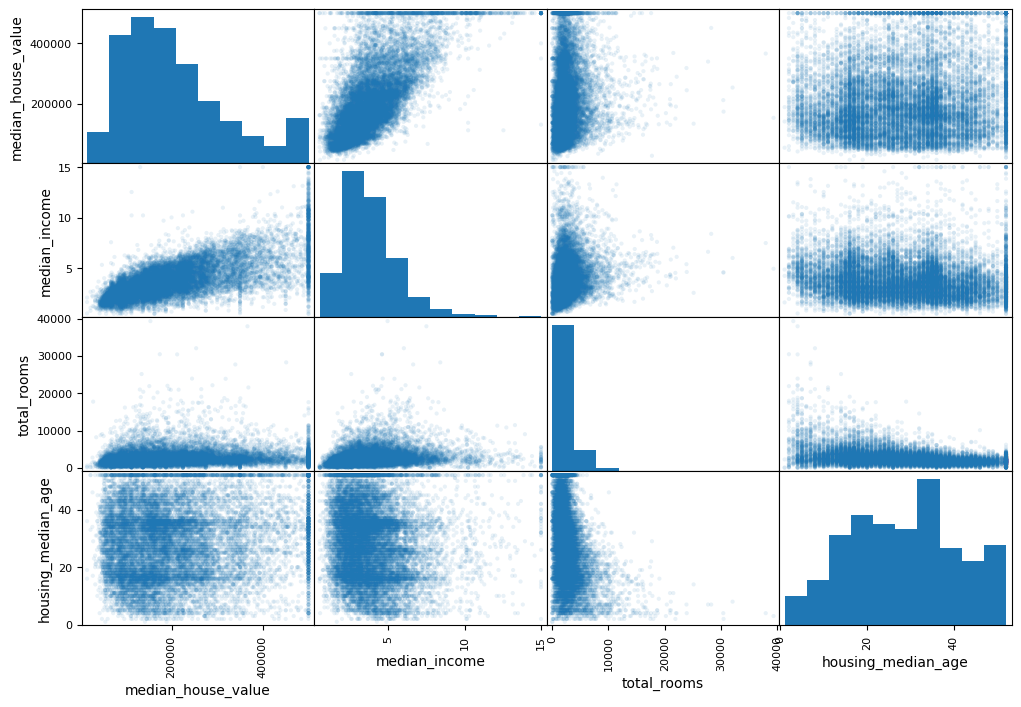

In [28]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8), alpha=0.1)

<Axes: xlabel='median_income', ylabel='median_house_value'>

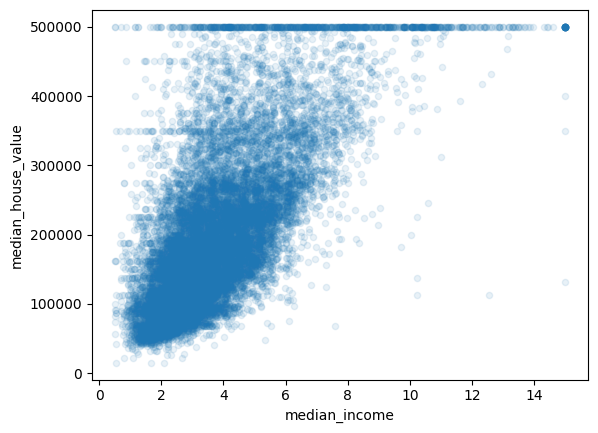

In [29]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [30]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]
housing["income_age_ratio"] = housing["median_income"]/housing["housing_median_age"]

In [31]:
corr_matrix = housing.corr(numeric_only=True)

In [32]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687151
income_age_ratio            0.203864
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [33]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


In [34]:
#housing.dropna(subset="total_bedrooms")

In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [36]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(columns = housing_num.columns, index=housing_num.index)

In [37]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [38]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]


array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [39]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder= OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat) # one hot encoded categories means that the categories will be converted to an array
                                                          # "ISLAND" would be [ 0 , 0 , 1 , 0 , 0] because it is the 3rd value.
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [40]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin

med_age_ix, rooms_ix, bedrooms_ix, population_ix, households_ix, med_income_ix = 2,3,4,5,6,7

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y= None):
        return self
    def transform(self, X):
        rooms_per_household = X[:,rooms_ix]/X[:,households_ix]
        population_per_household = X[:,population_ix]/X[:,households_ix]
        income_age_ratio = X[:, med_income_ix] / X[:, med_age_ix] 
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, income_age_ratio, bedrooms_per_room]
        else: 
            return np.c_[X,rooms_per_household, population_per_household, income_age_ratio]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')), # do this first to fill in the missing values in the totalbedrooms 
    ('attribs_adder', CombinedAttributesAdder()), # add the derived attributes that tell us a bit more 
    ('std_scaler', StandardScaler()),]) # use scaler to normalize data

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [43]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([ # we use column transfer here because it's good at taking care of categorical columns like "ocean_proximity" 
        ("num", num_pipeline, num_attribs), # reg pipeline
        ("cat", OneHotEncoder(), cat_attribs)]) # one hot encoded categorical columns
housing_prepared = full_pipeline.fit_transform(housing) 

In [44]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [45]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:" , lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 85806.97078796 304360.93762757 151771.41887621 186295.2378708
 244943.24265586]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [46]:
from sklearn.metrics import mean_squared_error

housing_predictions= lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions) 
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68623.89662876792)

In [47]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)


DecisionTreeRegressor()

In [48]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse= np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [50]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [51]:
display_scores(tree_rmse_scores)

Scores: [70577.16485314 71728.73014352 68690.87630381 71024.58153516
 68994.18027085 77945.39509661 72377.30559897 73364.07934994
 68534.02858738 70473.60682834]
Mean: 71370.9948567726
Standard Deviation: 2660.2987490288556


In [52]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [71768.09336659 64104.53787269 67761.67738601 68619.39479276
 66853.39874942 72531.98587472 74056.27757848 68812.91427211
 66482.70913767 70186.78599455]
Mean: 69117.77750250036
Standard Deviation: 2891.3052000113803


In [53]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

forest_reg.fit(housing_prepared,housing_labels)


RandomForestRegressor()

In [54]:
housing_predictions = forest_reg.predict(housing_prepared)

forest_mse = mean_squared_error(housing_labels,housing_predictions)
forest_rmse = np.sqrt(forest_mse)

print(forest_rmse)


18695.07516768346


In [55]:

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)


Scores: [51235.69546965 48693.54283484 47275.09660765 52330.53338797
 47717.07201237 51749.5356414  52390.30882341 49648.05828474
 49226.35397915 54128.73544392]
Mean: 50439.493248509316
Standard Deviation: 2142.749956579638


In [76]:
import joblib

joblib.dump(forest_reg, "random_forest_model.pkl")

['random_forest_model.pkl']

In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [6,8,9]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features':[2,3,4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [6, 8, 9],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [68]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)
    

59461.50467119046 {'max_features': 6, 'n_estimators': 3}
52969.296636823354 {'max_features': 6, 'n_estimators': 10}
50580.23186003855 {'max_features': 6, 'n_estimators': 30}
60131.45867435826 {'max_features': 8, 'n_estimators': 3}
52524.41563994539 {'max_features': 8, 'n_estimators': 10}
50482.21997706694 {'max_features': 8, 'n_estimators': 30}
58541.91131109651 {'max_features': 9, 'n_estimators': 3}
52832.54051215114 {'max_features': 9, 'n_estimators': 10}
50687.694674595674 {'max_features': 9, 'n_estimators': 30}
63623.93232708948 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54704.66159668273 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60649.98956433563 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53431.613297252654 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
58748.22607295142 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
52263.32319732076 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [69]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.26723530e-02, 5.93583938e-02, 3.70314611e-02, 1.43158967e-02,
       1.40758815e-02, 1.45036193e-02, 1.28993089e-02, 3.48425131e-01,
       3.55623171e-02, 1.08167826e-01, 4.49219687e-02, 7.94217630e-02,
       7.77124388e-03, 1.44198104e-01, 5.40246058e-05, 2.41497378e-03,
       4.20573249e-03])

In [70]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "age_income_ratio","bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(np.float64(0.34842513149914534), 'median_income'),
 (np.float64(0.14419810441277822), 'INLAND'),
 (np.float64(0.10816782639496074), 'pop_per_hhold'),
 (np.float64(0.07942176295560426), 'bedrooms_per_room'),
 (np.float64(0.07267235295385222), 'longitude'),
 (np.float64(0.05935839380949404), 'latitude'),
 (np.float64(0.04492196869093264), 'age_income_ratio'),
 (np.float64(0.0370314610829063), 'housing_median_age'),
 (np.float64(0.035562317096684844), 'rooms_per_hhold'),
 (np.float64(0.014503619295969182), 'population'),
 (np.float64(0.014315896664990306), 'total_rooms'),
 (np.float64(0.014075881462788088), 'total_bedrooms'),
 (np.float64(0.012899308936284364), 'households'),
 (np.float64(0.007771243876858004), '<1H OCEAN'),
 (np.float64(0.004205732485670208), 'NEAR OCEAN'),
 (np.float64(0.002414973775249445), 'NEAR BAY'),
 (np.float64(5.4024605831765156e-05), 'ISLAND')]

In [73]:
final_model = grid_search.best_estimator_

x_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(x_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse= mean_squared_error(y_test, final_predictions)

final_rmse = np.sqrt(final_mse)
final_rmse

np.float64(47985.58796559559)

In [74]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) **2

np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
    loc=squared_errors.mean(),
    scale=stats.sem(squared_errors)))

array([46014.43997654, 49878.8995313 ])

In [77]:
joblib.dump(final_model, "final_model.pkl")

['final_model.pkl']